# **Importing Libiraries**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from pathlib import Path
from PIL import Image

# **Load Images**

In [ ]:
def read_pil_image(img_path, height, width):
        with open(img_path, 'rb') as f:
            return np.array(Image.open(f).convert('RGB').resize((width, height)))

targetSize = 224
trainingSet_path = '/content/drive/MyDrive/Colab Notebooks/Classifying shoulder implants in X-ray images/Dataset/Train'
testSet_path = '/content/drive/MyDrive/Colab Notebooks/Classifying shoulder implants in X-ray images/Dataset/Test'

TrainImages = np.array([read_pil_image(str(p), targetSize, targetSize) for p in Path(trainingSet_path).rglob("*."+"jpg")]) 

testImages = np.array([read_pil_image(str(p), targetSize, targetSize) for p in Path(testSet_path).rglob("*."+"jpg")]) 

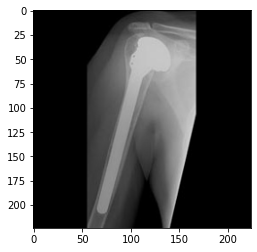

In [ ]:
plt.imshow(TrainImages[0])

# **Images Normalization**

In [ ]:
mean_Train = TrainImages.mean()
std_Train = TrainImages.std()
TrainImages = (TrainImages-mean_Train)/std_Train

mean_Test = testImages.mean()
std_Test = testImages.std()
testImages = (testImages - mean_Test)/std_Test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


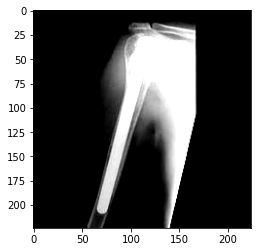

In [ ]:
plt.imshow(TrainImages[0])

# ***Data Augmenation on Training Set***

In [ ]:
trainDataGen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                 )
trainDataGen.fit(TrainImages)

In [ ]:
training_set = trainDataGen.flow_from_directory(trainingSet_path,
                                                target_size = (targetSize, targetSize),
                                                batch_size = 32,
                                                class_mode = 'categorical')
print(training_set.class_indices)

Found 480 images belonging to 4 classes.
{'Cofield': 0, 'Depuy': 1, 'Tornier': 2, 'Zimmer': 3}


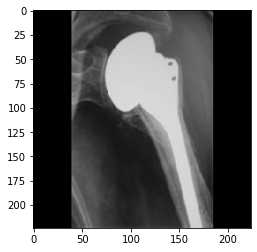

[0. 0. 1. 0.]


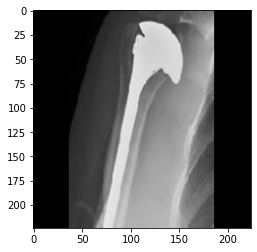

[0. 1. 0. 0.]


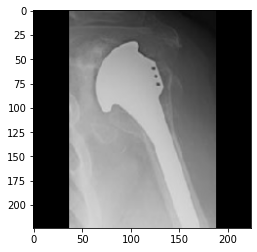

[0. 1. 0. 0.]


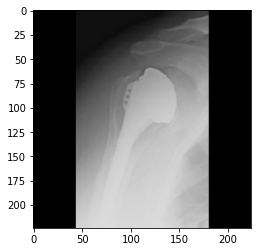

[0. 1. 0. 0.]


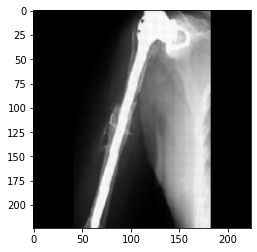

[1. 0. 0. 0.]


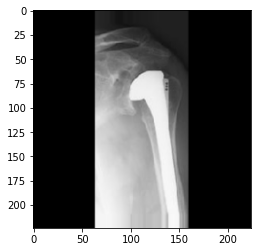

[0. 1. 0. 0.]


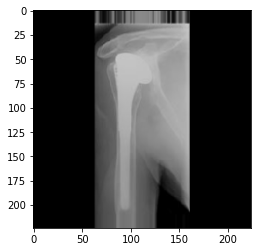

[0. 1. 0. 0.]


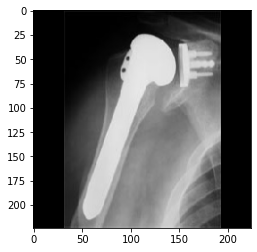

[1. 0. 0. 0.]


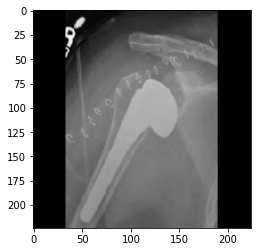

[0. 0. 1. 0.]


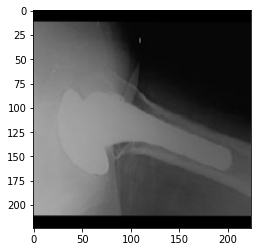

[0. 0. 1. 0.]


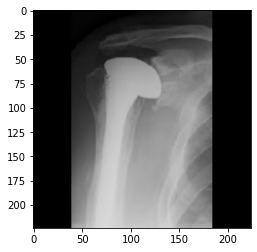

[0. 1. 0. 0.]


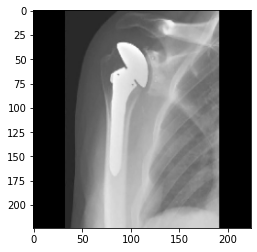

[0. 0. 0. 1.]


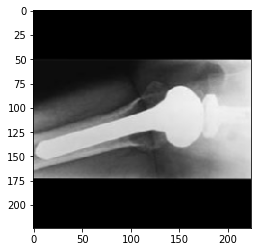

[1. 0. 0. 0.]


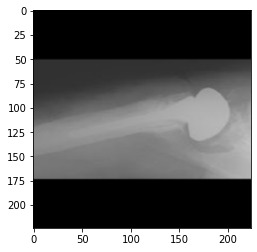

[0. 1. 0. 0.]


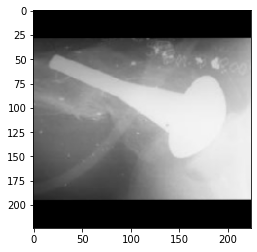

[0. 1. 0. 0.]


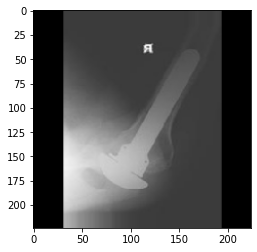

[0. 0. 0. 1.]


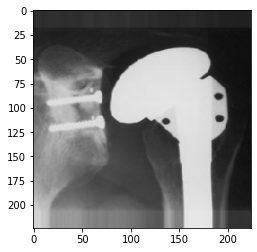

[1. 0. 0. 0.]


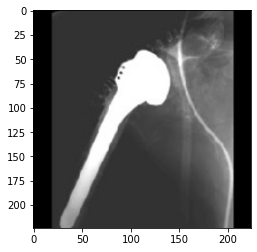

[0. 1. 0. 0.]


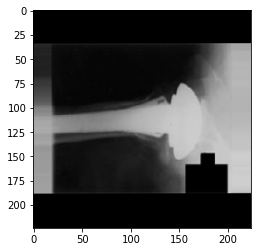

[0. 1. 0. 0.]


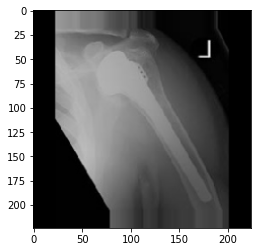

[0. 1. 0. 0.]


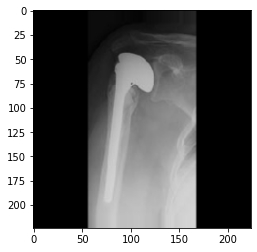

[0. 1. 0. 0.]


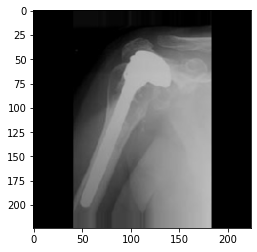

[0. 0. 0. 1.]


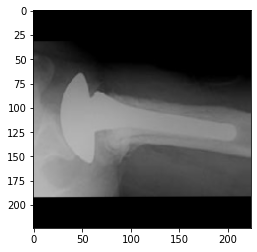

[0. 1. 0. 0.]


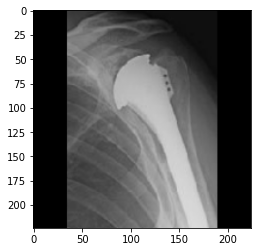

[0. 1. 0. 0.]


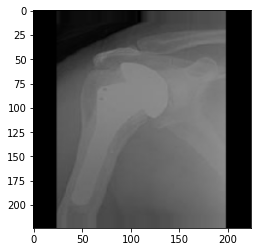

[0. 0. 1. 0.]


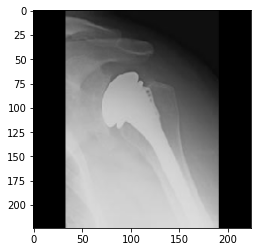

[0. 1. 0. 0.]


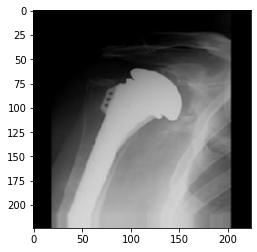

[0. 1. 0. 0.]


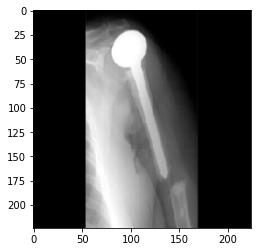

[1. 0. 0. 0.]


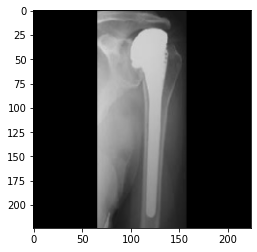

[0. 1. 0. 0.]


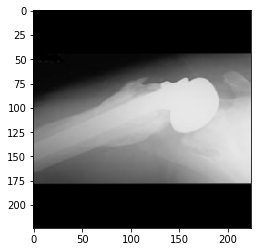

[0. 1. 0. 0.]


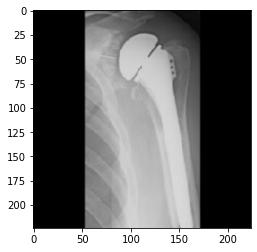

[0. 1. 0. 0.]


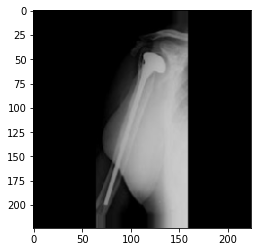

[0. 1. 0. 0.]


In [ ]:
for batch in training_set:
  image, label = batch
  for i in range(len(label)):
    plt.imshow(image[i])
    plt.show()
    print (label[i])
  break

# **Data Augmenation on Test Set**

In [ ]:
testDataGen = ImageDataGenerator(rescale=1./255)
testDataGen.fit(testImages)

In [ ]:
test_set = testDataGen.flow_from_directory(testSet_path,
                                           target_size = (targetSize, targetSize),
                                           batch_size = 12,
                                           class_mode = 'categorical')

Found 117 images belonging to 4 classes.


# **Add First Conolution Layer**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())

# **Add Second Conolution Layer**

In [ ]:
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

# **Add Thrid Conolution Layer**

In [ ]:
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D())

In [ ]:
model.add(Flatten())

# **Add Fully Connected Layer**

In [ ]:
model.add(Dense(256, activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)      

In [ ]:
hist = model.fit(training_set,
                    steps_per_epoch=training_set.samples//32,
                    epochs=25,
                    validation_data = test_set,
                    validation_steps = 10 )

Epoch 1/25
15/15 [==============================] - 9s 577ms/step - loss: 2.6682 - accuracy: 0.4042 - val_loss: 1.3662 - val_accuracy: 0.4957
Epoch 2/25
15/15 [==============================] - 8s 548ms/step - loss: 1.3039 - accuracy: 0.4917 - val_loss: 1.2787 - val_accuracy: 0.4957
Epoch 3/25
15/15 [==============================] - 8s 551ms/step - loss: 1.2608 - accuracy: 0.4917 - val_loss: 1.2450 - val_accuracy: 0.4957
Epoch 4/25
15/15 [==============================] - 8s 551ms/step - loss: 1.2437 - accuracy: 0.4917 - val_loss: 1.2066 - val_accuracy: 0.4957
Epoch 5/25
15/15 [==============================] - 8s 553ms/step - loss: 1.2361 - accuracy: 0.4917 - val_loss: 1.2402 - val_accuracy: 0.5043
Epoch 6/25
15/15 [==============================] - 8s 546ms/step - loss: 1.2310 - accuracy: 0.4958 - val_loss: 1.2148 - val_accuracy: 0.4957
Epoch 7/25
15/15 [==============================] - 8s 553ms/step - loss: 1.2213 - accuracy: 0.4979 - val_loss: 1.2046 - val_accuracy: 0.4957
Epoch 

# **Data Visualization**

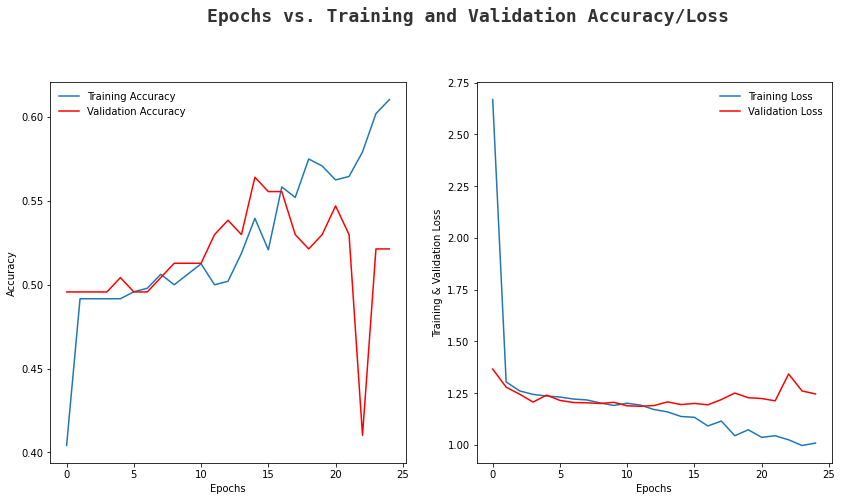

In [ ]:
epochs = [i for i in range(25)]
fig, ax = plt.subplots(1,2,figsize=(14,7))

train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',y=1,x=0.28,alpha=0.8)

ax[0].plot(epochs, train_acc,
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, c = 'r',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss,
           label ='Training Loss')
ax[1].plot(epochs, val_loss, c = 'r',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()